At first, we are importing the necessary Python packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Let's download the iris dataset from its weblink as follows:

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we have to read the dataset using the Pandas data frame as follows:

In [ ]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

Now, observe the data.

In [ ]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's implement the very basic step of data preprocessing.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's do the data scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Naive Bayes**

Now, we are training the model with the help of the GaussianNB class of sklearn as follows:

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

Let us first test the accuracy of the Naive Bayes classifier over the training dataset.

In [ ]:
y_pred = classifier.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714285714285714


For the Naive Bayes classifier, we are achieving an accuracy of 97.14% (approximately) for the training dataset. Therefore, the accuracy is really good on the training dataset.

Now, we have to make the prediction, which can be done in the following way:

In [ ]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

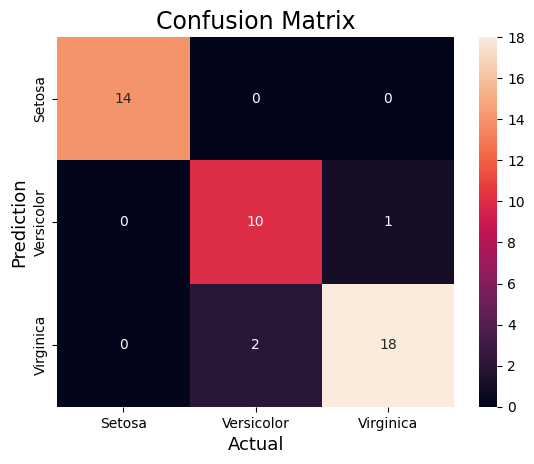

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

Out of 14 Setosas, 14 have been correctly classified as Setosa. Out of 11 versicolors, 10 have been correctly classified as Versicolor and 1 has been wrongly classified as Virginica. Out of 20 Virginicas, 18 have been correctly classified as Virginica and 2 has been wrongly classified as Versicolor.

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.95      0.90      0.92        20

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


We have achieved an accuracy of 93.733% (approximately) using Naive Bayes classifier. Therefore, the accuracy is also good for the test dataset.

As we can see, the accuracies are almost similar for the training and test datasets in the case of the Naive Bayes classifier. Hence, we can also conclude that there are no underfitting or overfitting scenarios.

**Support Vector Machine (SVM)**

Let us first test the accuracy of the SVM classifier for different kernels over the training dataset.

In [ ]:
# Import support vector classifier
# "Support Vector Classifier"

from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_list.append(accuracy)

  print("Accuracy of "+i, "is", float(accuracy))

Accuracy of linear is 0.9904761904761905
Accuracy of poly is 0.9428571428571428
Accuracy of rbf is 0.9904761904761905
Accuracy of sigmoid is 0.8761904761904762


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    "Sigmoid": accuracy_list[3]
}

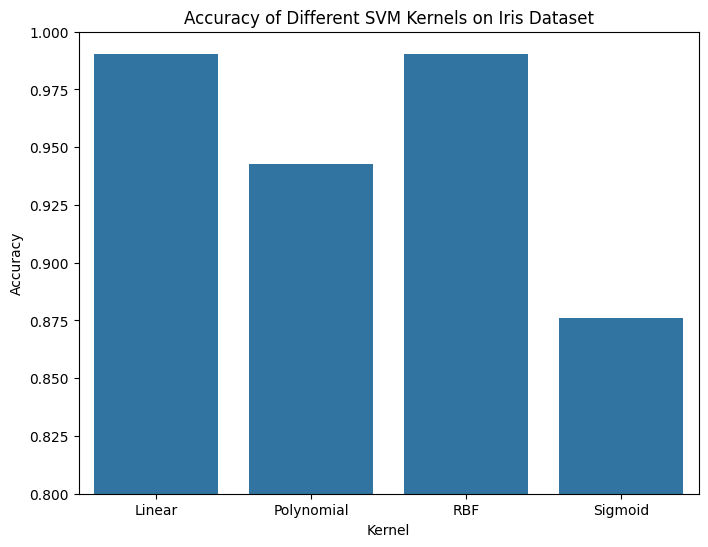

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')

# We have set y-axis limit for better visualization
plt.ylim(0.8, 1.0)
plt.show()

In SVM, we have achieved the highest accuracy with the Linear & RBF kernel, which is 99.05%. In the case of the sigmoid kernel and polynomial kernel, we have achieved accuracies of 87.62% and 94.28% respectively. Therefore, the accuracies are really good on the training datasets for the different kernels used by the SVM.

In [ ]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("Accuracy of "+ i, "is", float(accuracy))

Accuracy of linear is 0.9777777777777777
Accuracy of poly is 0.9111111111111111
Accuracy of rbf is 0.9111111111111111
Accuracy of sigmoid is 0.8444444444444444


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    "Sigmoid": accuracy_list[3]
}

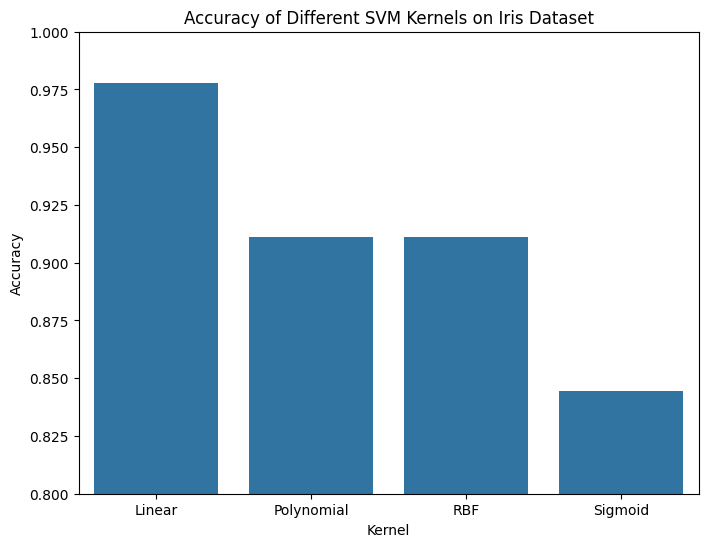

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')

# We have set y-axis limit for better visualization
plt.ylim(0.8, 1.0)
plt.show()

In SVM, we have achieved the highest accuracy with the linear which is 97.78%. In the Polinomial and RBF kernel, we have achieved the 2nd highest accuracy, which is 91.11%. In sigmoid kernel we achieved 84.44% Therefore, the accuracies are really good on the test datasets for the different kernels used by the SVM. We can also conclude that there is no overfitting, as there is not much difference between the training and testing accuracies.

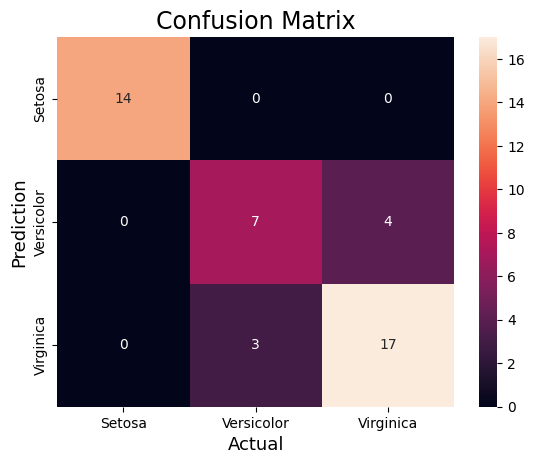

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

Out of 14 Setosas, 14 have been correctly classified as Setosa. Out of 11 Versicolors, 7 have been correctly classified as Versicolor, and 4 have been wrongly classified as Virginica. Out of 20 Virginicas, 17 have been correctly classified as Virginica, and 3 have been wrongly classified as Versicolor.

**K Nearest Neighbors (KNN)**

Now, we are training the model with the help of the KNeighborsClassifier class of sklearn as follows:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Let us first test the accuracy of the KNN classifier for different K values over the training dataset.

In [ ]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9619047619047619


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9714285714285714


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9809523809523809


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9809523809523809


Here, we have observed that the KNN algorithm is doing well for the values K = 8, 9, 10, and 11 where it has achieved the highest accuracy of 98.09% at K = 10 and 11 on the training dataset.

Now, we have to make the prediction, which can be done in the following way:

In [ ]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

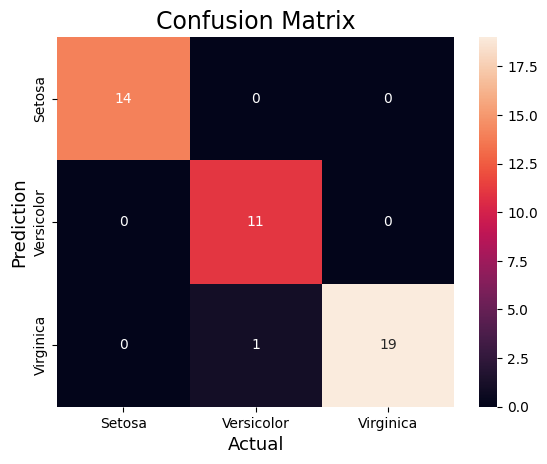

In [ ]:
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

Out of 14 Setosas, 14 have been correctly classified as Setosa. Out of 11 Versicolors, 11 have been correctly classified as Versicolor. Out of 20 Virginicas, 19 have been correctly classified as Virginica, and 1 have been wrongly classified as Versicolor.

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.95      0.90      0.92        20

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


Let's check the accuracy for K = 9.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

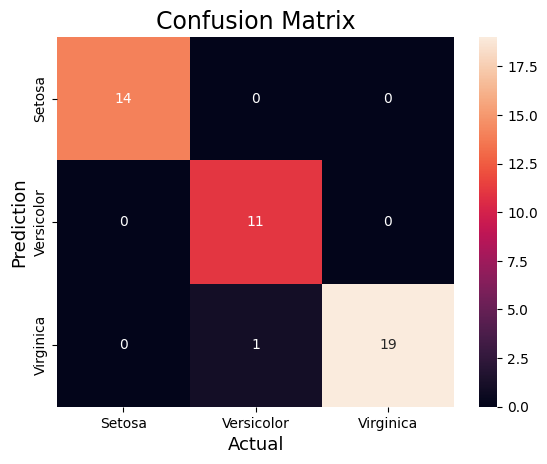

In [ ]:
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

Out of 14 Setosas, 14 have been correctly classified as Setosa. Out of 11 Versicolors, 11 have been correctly classified as Versicolor. Out of 20 Virginicas, 19 have been correctly classified as Virginica, and 1 have been wrongly classified as Versicolor.

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.95      0.97        20

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Let's check the accuracy for K = 10.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

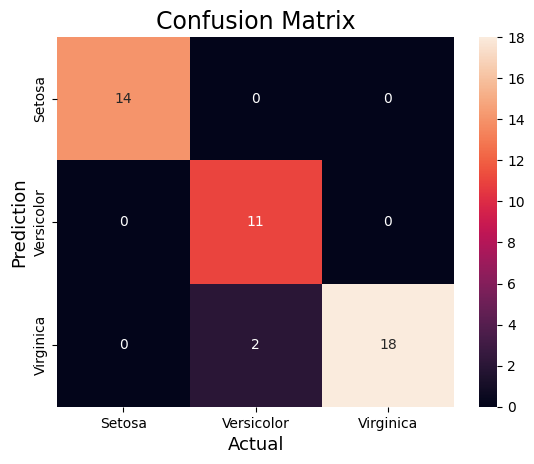

In [ ]:
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

Out of 14 Setosas, 14 have been correctly classified as Setosa. Out of 11 Versicolors, 11 have been correctly classified as Versicolor. Out of 20 Virginicas, 18 have been correctly classified as Virginica, and 2 have been wrongly classified as Versicolor.

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.96        45
      macro avg       0.95      0.97      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


Here, we have observed that the KNN algorithm is doing well for the values K = 9 and 10 where it has achieved the highest accuracy of 97.78% for the test dataset. There are no such differences in accuracy between training and test datasets while exploring KNN over it. Therefore, there is no scenario of overfitting or underfitting.